In [1]:
#01.Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results.

import math
import scipy.stats as st

def z_test(sample_mean, population_mean, population_std, sample_size, alpha=0.05):
    """
    Performs a one-sample Z-test to compare a sample mean to a known population mean.

    Args:
        sample_mean (float): The mean of the sample.
        population_mean (float): The known population mean.
        population_std (float): The known population standard deviation.
        sample_size (int): The size of the sample.
        alpha (float, optional): The significance level. Defaults to 0.05.

    Returns:
        tuple: A tuple containing:
            - z_statistic (float): The calculated z-statistic.
            - p_value (float): The p-value associated with the z-statistic.
            - decision (str): A string indicating whether to reject or fail to reject the null hypothesis.
    """

    # Calculate the standard error
    standard_error = population_std / math.sqrt(sample_size)

    # Calculate the z-statistic
    z_statistic = (sample_mean - population_mean) / standard_error

    # Calculate the p-value (two-tailed test)
    p_value = 2 * (1 - st.norm.cdf(abs(z_statistic)))

    # Determine the decision
    if p_value < alpha:
        decision = "Reject the null hypothesis"
    else:
        decision = "Fail to reject the null hypothesis"

    return z_statistic, p_value, decision

# Example Usage
sample_mean = 25.2
population_mean = 27
population_std = 3.5
sample_size = 100
alpha = 0.05

z_stat, p_val, decision = z_test(sample_mean, population_mean, population_std, sample_size, alpha)

print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_val:.4f}")
print(f"Decision: {decision}")

if decision == "Reject the null hypothesis":
    print("There is a statistically significant difference between the sample mean and the population mean.")
else:
    print("There is no statistically significant difference between the sample mean and the population mean.")

Z-statistic: -5.14
P-value: 0.0000
Decision: Reject the null hypothesis
There is a statistically significant difference between the sample mean and the population mean.


In [2]:
#02.Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python ?

import numpy as np
from scipy import stats

np.random.seed(0)
group1 = np.random.normal(loc=5, scale=2, size=100)
group2 = np.random.normal(loc=5.5, scale=2, size=100)

t_statistic, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

T-statistic: -1.88
P-value: 0.062
Fail to reject the null hypothesis. No significant difference.


In [3]:
#03.Implement a one-sample Z-test using Python to compare the sample mean with the population mean?

import numpy as np
from scipy import stats

def one_sample_z_test(sample_data, population_mean, population_std_dev, alpha=0.05, alternative='two-sided'):
    """
    Performs a one-sample Z-test.

    Args:
        sample_data (list or numpy array): The sample data.
        population_mean (float): The population mean.
        population_std_dev (float): The population standard deviation.
        alpha (float, optional): The significance level. Defaults to 0.05.
        alternative (str, optional): The type of alternative hypothesis.
            'two-sided': Population mean is different from the hypothesized mean.
            'greater': Population mean is greater than the hypothesized mean.
            'less': Population mean is less than the hypothesized mean. Defaults to 'two-sided'.

    Returns:
        tuple: A tuple containing the test statistic, p-value, and a boolean indicating
               whether the null hypothesis is rejected.
    """
    sample_mean = np.mean(sample_data)
    sample_size = len(sample_data)

    # Calculate the Z-statistic
    z_statistic = (sample_mean - population_mean) / (population_std_dev / np.sqrt(sample_size))

    # Calculate the p-value based on the alternative hypothesis
    if alternative == 'two-sided':
        p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))
    elif alternative == 'greater':
        p_value = 1 - stats.norm.cdf(z_statistic)
    elif alternative == 'less':
        p_value = stats.norm.cdf(z_statistic)
    else:
        raise ValueError("Invalid alternative hypothesis specified.")

    # Determine if the null hypothesis is rejected
    reject_null = p_value < alpha

    return z_statistic, p_value, reject_null

# Example Usage
sample_data = [10, 12, 15, 13, 11, 14, 16, 18, 12, 13]
population_mean = 13
population_std_dev = 2.5
alpha = 0.05
alternative = 'two-sided' # or 'greater' or 'less'

z_stat, p_val, reject = one_sample_z_test(sample_data, population_mean, population_std_dev, alpha, alternative)

print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_val:.3f}")
print(f"Reject null hypothesis: {reject}")

Z-statistic: 0.506
P-value: 0.613
Reject null hypothesis: False


Reject the null hypothesis


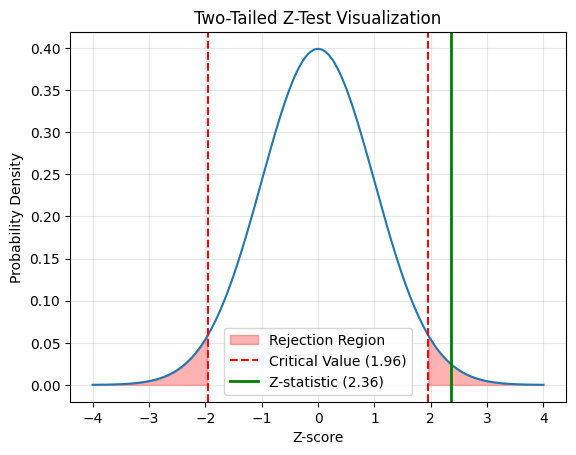

In [5]:
#04.Perform a two-tailed Z-test using Python and visualize the decision region on a plot ?

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

sample_mean = 105
pop_mean = 100
pop_std = 15
sample_size = 50
alpha = 0.05

z_statistic = (sample_mean - pop_mean) / (pop_std / np.sqrt(sample_size))

critical_value = stats.norm.ppf(1 - alpha/2)
critical_value_neg = -critical_value

p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Define x outside the if/else block so it's always available for plotting
x = np.linspace(-4, 4, 200)
y = stats.norm.pdf(x, 0, 1)

plt.plot(x, y)

# Rejection regions
x_fill_left = np.linspace(-4, critical_value_neg, 100)
y_fill_left = stats.norm.pdf(x_fill_left, 0, 1)
plt.fill_between(x_fill_left, y_fill_left, color='red', alpha=0.3, label='Rejection Region')

x_fill_right = np.linspace(critical_value, 4, 100)
y_fill_right = stats.norm.pdf(x_fill_right, 0, 1)
plt.fill_between(x_fill_right, y_fill_right, color='red', alpha=0.3)

# Critical values
plt.axvline(x=critical_value, color='red', linestyle='--', label=f'Critical Value ({critical_value:.2f})')
plt.axvline(x=critical_value_neg, color='red', linestyle='--')

# Test statistic
plt.axvline(x=z_statistic, color='green', linewidth=2, label=f'Z-statistic ({z_statistic:.2f})')

plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.title('Two-Tailed Z-Test Visualization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

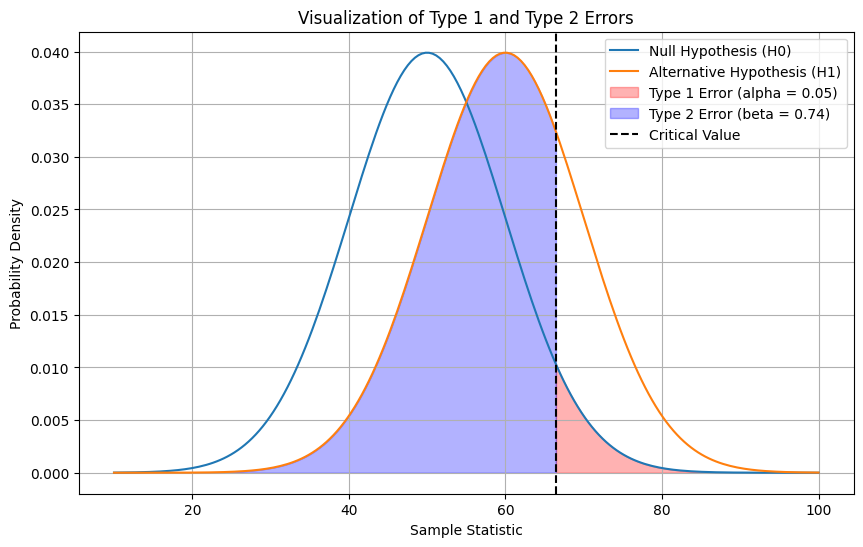

In [6]:
#05.Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing?

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def visualize_hypothesis_errors(null_mean, null_std, alt_mean, alt_std, alpha):
    """
    Calculates and visualizes Type 1 and Type 2 errors in hypothesis testing.

    Args:
        null_mean (float): Mean of the null hypothesis distribution.
        null_std (float): Standard deviation of the null hypothesis distribution.
        alt_mean (float): Mean of the alternative hypothesis distribution.
        alt_std (float): Standard deviation of the alternative hypothesis distribution.
        alpha (float): Significance level (probability of Type 1 error).
    """

    # Calculate the critical value
    critical_value = norm.ppf(1 - alpha, loc=null_mean, scale=null_std)

    # Calculate Type 2 error (beta)
    beta = norm.cdf(critical_value, loc=alt_mean, scale=alt_std)

    # Generate x-values for plotting
    x_min = min(null_mean - 4 * null_std, alt_mean - 4 * alt_std)
    x_max = max(null_mean + 4 * null_std, alt_mean + 4 * alt_std)
    x = np.linspace(x_min, x_max, 200)

    # Generate probability density functions
    null_pdf = norm.pdf(x, loc=null_mean, scale=null_std)
    alt_pdf = norm.pdf(x, loc=alt_mean, scale=alt_std)

    # Plot the distributions
    plt.figure(figsize=(10, 6))
    plt.plot(x, null_pdf, label='Null Hypothesis (H0)')
    plt.plot(x, alt_pdf, label='Alternative Hypothesis (H1)')

    # Shade the Type 1 error area
    x_type1 = np.linspace(critical_value, x_max, 100)
    y_type1 = norm.pdf(x_type1, loc=null_mean, scale=null_std)
    plt.fill_between(x_type1, y_type1, color='red', alpha=0.3, label=f'Type 1 Error (alpha = {alpha:.2f})')

    # Shade the Type 2 error area
    x_type2 = np.linspace(x_min, critical_value, 100)
    y_type2 = norm.pdf(x_type2, loc=alt_mean, scale=alt_std)
    plt.fill_between(x_type2, y_type2, color='blue', alpha=0.3, label=f'Type 2 Error (beta = {beta:.2f})')

    # Add a vertical line at the critical value
    plt.axvline(critical_value, color='black', linestyle='--', label='Critical Value')

    plt.xlabel('Sample Statistic')
    plt.ylabel('Probability Density')
    plt.title('Visualization of Type 1 and Type 2 Errors')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
null_mean = 50
null_std = 10
alt_mean = 60
alt_std = 10
alpha = 0.05

visualize_hypothesis_errors(null_mean, null_std, alt_mean, alt_std, alpha)

In [7]:
#06.Write a Python program to perform an independent T-test and interpret the results?

import numpy as np
from scipy import stats

# Sample data for two independent groups
group1 = np.array([25, 30, 35, 40, 45])
group2 = np.array([20, 28, 32, 38, 42])

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Set significance level
alpha = 0.05

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpretation
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means of the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means of the two groups.")

T-statistic: 0.5741692517632145
P-value: 0.5816333668955778
Fail to reject the null hypothesis: There is no significant difference between the means of the two groups.


T-statistic: -7.904
P-value: 0.000


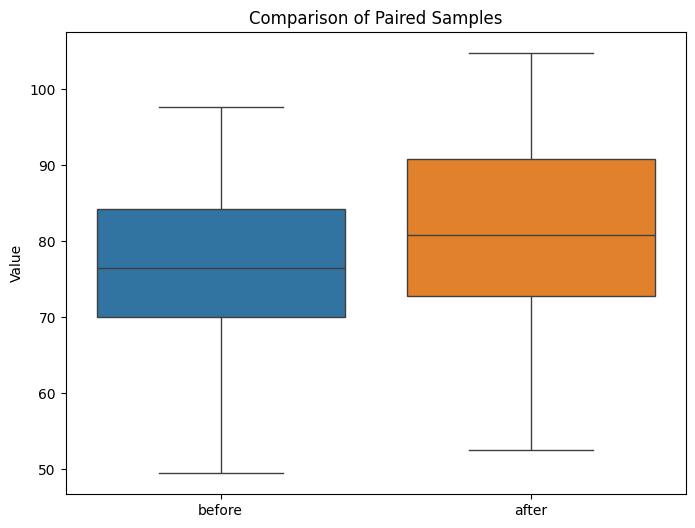

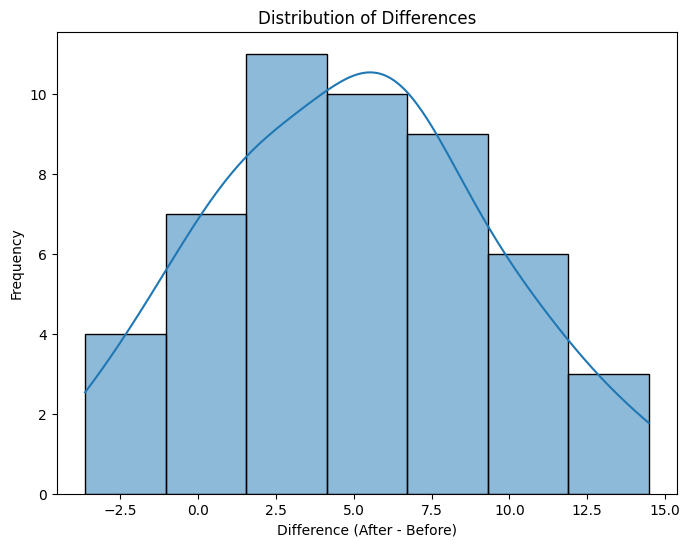

In [8]:
#07.Perform a paired sample T-test using Python and visualize the comparison results?

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)  # for reproducibility
data_before = np.random.normal(loc=75, scale=10, size=50)
data_after = data_before + np.random.normal(loc=5, scale=5, size=50)
data = pd.DataFrame({'before': data_before, 'after': data_after})
t_statistic, p_value = stats.ttest_rel(data['before'], data['after'])
print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")
plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.title('Comparison of Paired Samples')
plt.ylabel('Value')
plt.show()
differences = data['after'] - data['before']
plt.figure(figsize=(8, 6))
sns.histplot(differences, kde=True)
plt.title('Distribution of Differences')
plt.xlabel('Difference (After - Before)')
plt.ylabel('Frequency')
plt.show()

In [9]:
#08.Simulate data and perform both Z-test and T-test, then compare the results using Python?

import numpy as np
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest

# Simulate data for Z-test (large sample)
np.random.seed(0)
z_data_group1 = np.random.normal(loc=50, scale=10, size=100)
z_data_group2 = np.random.normal(loc=55, scale=10, size=100)

# Simulate data for T-test (small sample)
t_data_group1 = np.random.normal(loc=50, scale=10, size=25)
t_data_group2 = np.random.normal(loc=55, scale=10, size=25)

# Perform Z-test
z_statistic, z_p_value = ztest(z_data_group1, z_data_group2)
print(f"Z-test: z-stat = {z_statistic:.3f}, p-value = {z_p_value:.3f}")

# Perform T-test
t_statistic, t_p_value = stats.ttest_ind(t_data_group1, t_data_group2)
print(f"T-test: t-stat = {t_statistic:.3f}, p-value = {t_p_value:.3f}")

Z-test: z-stat = -3.597, p-value = 0.000
T-test: t-stat = -1.154, p-value = 0.254


In [12]:
#09.Write a Python function to calculate the confidence interval for a sample mean and explain its significance?

import numpy as np
import scipy.stats as st

def confidence_interval(data, confidence=0.95):
    """
    Calculates the confidence interval for a sample mean.

    Args:
        data (list or numpy array): Sample data.
        confidence (float): Confidence level (e.g., 0.95 for 95%).

    Returns:
        tuple: A tuple containing the lower and upper bounds of the confidence interval.
    """
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return m - h, m + h

# Example usage
data = [10, 12, 15, 13, 11, 14, 16, 12, 13, 14]
lower_bound, upper_bound = confidence_interval(data, confidence=0.95)
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")


95% Confidence Interval: (11.69, 14.31)


In [13]:
#10.Write a Python program to calculate the margin of error for a given confidence level using sample data ?

import numpy as np
import scipy.stats as st
import math

def calculate_margin_of_error(data, confidence_level):
    """
    Calculates the margin of error for a given confidence level using sample data.

    Args:
        data (list): A list of numerical data representing the sample.
        confidence_level (float): The desired confidence level (e.g., 0.95 for 95%).

    Returns:
        float: The margin of error.
    """
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)  # Use ddof=1 for sample standard deviation
    sample_size = len(data)
    alpha = 1 - confidence_level
    degrees_freedom = sample_size - 1

    critical_value = st.t.ppf(1-alpha/2, degrees_freedom)
    standard_error = sample_std / math.sqrt(sample_size)
    margin_of_error = critical_value * standard_error

    return margin_of_error

if __name__ == '__main__':
    sample_data = [10, 12, 15, 13, 11, 14, 16, 12, 13, 15]
    confidence_level = 0.95
    margin_error = calculate_margin_of_error(sample_data, confidence_level)
    print(f"Margin of Error: {margin_error:.3f}")


Margin of Error: 1.368


In [14]:
#11.Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process?

def bayes_theorem(prior, likelihood, evidence):
    """
    Calculates the posterior probability using Bayes' Theorem.

    Args:
      prior: The prior probability of the hypothesis.
      likelihood: The likelihood of the evidence given the hypothesis.
      evidence: The probability of the evidence.

    Returns:
      The posterior probability of the hypothesis given the evidence.
    """
    posterior = (likelihood * prior) / evidence
    return posterior

# Example Usage:
prior_probability = 0.2  # prior probability of the hypothesis
likelihood_probability = 0.8 # probability of the evidence given the hypothesis
evidence_probability = 0.3 # probability of the evidence

posterior = bayes_theorem(prior_probability, likelihood_probability, evidence_probability)
print(f"Posterior Probability: {posterior:.3f}")

Posterior Probability: 0.533


In [16]:
#12.Perform a Chi-square test for independence between two categorical variables in Python?

import pandas as pd
from scipy.stats import chi2_contingency

data = {'Variable1': ['A', 'A', 'B', 'B', 'A', 'B'],
       'Variable2': ['X', 'Y', 'X', 'Y', 'X', 'X']}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['Variable1'], df['Variable2'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)


Variable2  X  Y
Variable1      
A          2  1
B          2  1
Chi-squared statistic: 0.0
P-value: 1.0
Degrees of freedom: 1
Expected frequencies:
 [[2. 1.]
 [2. 1.]]


In [17]:
#13.Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data ?

import numpy as np

def calculate_expected_frequencies(observed_data):
    """
    Calculates the expected frequencies for a Chi-square test.

    Args:
      observed_data: A 2D numpy array representing the observed frequencies.

    Returns:
      A 2D numpy array representing the expected frequencies.
    """
    observed_data = np.array(observed_data)
    row_totals = observed_data.sum(axis=1)
    col_totals = observed_data.sum(axis=0)
    grand_total = observed_data.sum()

    expected_frequencies = np.outer(row_totals, col_totals) / grand_total
    return expected_frequencies

if __name__ == '__main__':
  observed_data = [[20, 30, 50],
                  [10, 40, 20]]

  expected_frequencies = calculate_expected_frequencies(observed_data)
  print("Observed Frequencies:\n", np.array(observed_data))
  print("\nExpected Frequencies:\n", expected_frequencies)

Observed Frequencies:
 [[20 30 50]
 [10 40 20]]

Expected Frequencies:
 [[17.64705882 41.17647059 41.17647059]
 [12.35294118 28.82352941 28.82352941]]


In [19]:
#14.Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution.


import numpy as np
from scipy.stats import chisquare

def goodness_of_fit_test(observed, expected):
    """
    Performs a Chi-Square goodness-of-fit test.

    Args:
        observed (list or array): Observed frequencies.
        expected (list or array): Expected frequencies.

    Returns:
        tuple: (chi-square statistic, p-value).
    """
    # Ensure the sums of observed and expected frequencies are equal
    observed_sum = sum(observed)
    expected_sum = sum(expected)

    if observed_sum != expected_sum:
        # Scale expected frequencies to match the observed total
        scale_factor = observed_sum / expected_sum
        scaled_expected = [freq * scale_factor for freq in expected]
        print(f"Warning: Sum of observed ({observed_sum}) does not match sum of expected ({expected_sum}). Scaling expected frequencies.")
        # Use scaled_expected for the test
        chi2_stat, p_value = chisquare(f_obs=observed, f_exp=scaled_expected)
    else:
        # If sums are already equal, proceed with original expected frequencies
        chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

    return chi2_stat, p_value

# Example Usage
observed_frequencies = [25, 28, 20, 18, 29] # Example observed data
expected_frequencies = [20, 25, 20, 20, 25] # Example expected data

chi2, p = goodness_of_fit_test(observed_frequencies, expected_frequencies)

print(f"Chi-square statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")

alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: Observed data does not fit the expected distribution.")
else:
    print("Fail to reject the null hypothesis: Observed data fits the expected distribution.")

Chi-square statistic: 1.413
P-value: 0.842
Fail to reject the null hypothesis: Observed data fits the expected distribution.
